In [1]:
import pandas as pd
import numpy as np
from seaborn import histplot
from LSH import LSH
from utils import vectorize, edit_distance

In [2]:
words = pd.read_csv('unigram_freq.csv')
words = words.dropna()
words = words.sort_values("count", ascending=False)[:5000]
words["vector"] = words["word"].apply(lambda w: vectorize(str(w)))
X, Y = np.array(list(words["vector"])), words["word"]

In [3]:
lsh = LSH(2).fit(X, Y)

In [4]:
def correct(word: str):
    v = vectorize(word)
    bucket = lsh[v]
    pred =  min(bucket, key=lambda w: edit_distance(w, word))
    return pred

In [5]:
from utils import noise

def test(correct, words, verbose=False):
    acc = 0
    for word in words:
        x = noise(word)
        try:
            y = correct(x)
        except:
            print(x)
            y = x
        d = edit_distance(x, y)
        if verbose:
            print(f"{x:>10} ---{d}--> {y}")
        acc += d
    return acc / len(words)

<AxesSubplot:ylabel='Count'>

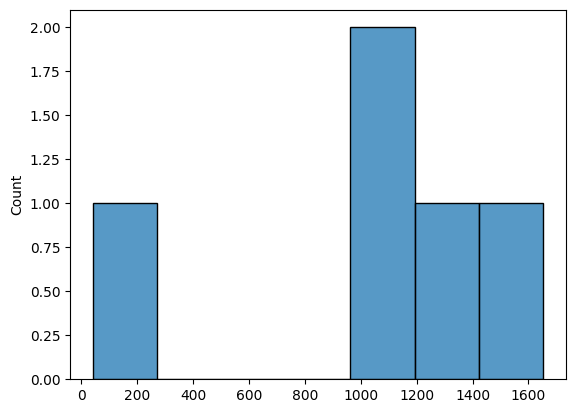

In [6]:
histplot([len(v) for v in lsh.buckets.values()])

In [7]:
test(correct, Y[:1000], True)

      theb ---1--> then
       ofj ---2--> or
      andi ---1--> and
       tox ---1--> to
        ab ---0--> ab
        iw ---1--> in
      forf ---1--> form
       isl ---1--> is
        op ---0--> op
      hhat ---1--> that
       byu ---1--> by
      bhis ---2--> ohio
      witt ---1--> with
        iy ---1--> in
       yfu ---2--> if
       itu ---1--> it
       nat ---1--> at
       orq ---1--> or
        bf ---1--> if
      areo ---1--> are
      fiom ---1--> film
        ad ---0--> ad
        gs ---1--> is
     yourb ---1--> your
       alc ---1--> all
      aave ---1--> have
       ncw ---1--> nc
      mtre ---2--> me
        ao ---1--> as
       wrs ---2--> is
        wm ---1--> am
      wiyl ---2--> win
      hvme ---2--> he
       cao ---1--> car
       usu ---1--> us
    abouts ---1--> about
       ifi ---2--> in
      zage ---1--> page
        mn ---0--> mn
       haa ---1--> had
    sevrch ---1--> search
      fdee ---1--> free
       tut ---1--> but
       gur ---1--> o

1.382

In [8]:
correct("bs")

'is'

In [12]:
%%time
bestie = min(Y[:1000000], lambda w: edit_distance(w, "wololo"))

TypeError: '>' not supported between instances of 'str' and 'function'

In [14]:
for word in Y[:10000]:
    edit_distance(word, "wololo")

6
5
6
5
6
6
5
6
5
6
6
6
5
6
5
6
5
5
6
6
5
6
6
5
4
6
6
5
6
5
5
3
5
6
6
5
6
6
6
6
6
6
6
5
5
5
5
5
9
6
6
6
6
6
6
5
5
6
6
5
6
6
6
6
4
5
6
5
6
6
8
4
5
4
5
5
6
6
6
5
6
6
6
6
6
3
5
5
6
6
8
5
6
5
6
5
7
6
6
6
6
6
6
5
5
6
5
6
6
5
6
6
6
5
5
5
6
6
3
6
6
6
5
6
4
5
5
7
6
6
6
6
6
5
6
6
5
6
6
6
6
4
6
6
6
7
8
6
7
6
6
7
6
6
4
5
3
6
5
5
6
6
4
6
5
6
6
6
6
6
6
6
5
6
7
4
6
6
6
6
5
6
6
6
6
6
6
5
6
6
7
8
10
7
5
4
6
7
6
5
5
6
5
6
10
6
6
4
6
6
4
5
6
6
12
6
6
6
5
6
7
6
9
5
5
6
6
5
6
5
4
6
6
6
6
7
4
5
6
6
6
8
7
6
6
6
5
8
7
8
5
6
6
5
5
6
8
8
7
7
5
5
5
4
6
5
5
5
5
6
5
6
7
6
6
6
6
4
6
6
5
5
5
5
7
5
6
6
6
6
6
6
6
5
5
6
5
6
8
5
6
5
8
4
6
7
5
4
6
6
5
7
7
6
4
5
6
6
5
6
6
5
6
6
6
5
8
7
5
6
6
5
5
5
6
8
6
6
7
6
8
6
5
8
5
6
6
5
6
5
6
6
9
7
6
6
6
8
6
7
6
6
6
5
7
5
7
5
6
4
4
5
6
4
5
6
10
5
10
5
6
6
9
6
5
5
7
5
6
5
5
6
6
7
6
6
7
5
6
6
3
4
5
7
8
6
5
6
5
5
6
5
6
6
5
6
6
4
5
6
9
6
6
6
5
6
6
5
5
6
6
6
4
5
8
4
6
5
5
7
6
9
8
5
5
4
6
5
6
6
5
8
5
5
5
6
6
5
7
5
5
6
6
5
8
6
6
6
7
6
7
5
6
6
6
4
8
6
8
5
6
7
6
6
8
5
5
10
5
5
5
6
5
9
6
6
8
